# Mock Lifestyle Data Based on Overall Sleep Health

The Sleep_Data APIs used were generated using Mockaroo.com, and modeled after the Sleep_health_and_lifestyle_dataset.csv obtained from the Kaggle dataset with the same corresponding name, authored by Laksika Tharmalingam 

Data Sources:

- https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
- Sleep_Data APIs are custom generated using Mockaroo.com schemas

In [2]:
import pandas as pd
import requests
import json
import random
import numpy as np
import matplotlib.pyplot as plt
#study = pd.read_csv("data/MOCK_SLEEP_DATA.csv")

#Our first dataset is hosted as a CSV on this API, so we need to request it and use read_csv via pandas to create the data frame
api_1 = "https://my.api.mockaroo.com/sleep_data_api.json?key=a19e1810"
requests.get(api_1)
study = pd.read_csv(api_1)
#Let's check out the shape of this data frame, the format is Rows, Columns
study.shape

(1000, 21)

In [3]:
#Our second dataset is hosted as a JSON file on this same API, so we need to use json_normalize to create the data frame
api_2 = "https://my.api.mockaroo.com/sleep_data_api_2.json?key=a19e1810"
requests.get(api_2)
r_2 = requests.get(api_2)
json_2 = r_2.json()

study_2 = pd.json_normalize(json_2)
study_2.shape

(1000, 21)

In [4]:
study.head(5)

,id,first_name,last_name,email,ip_address,Person ID,Gender,Age,Occupation,Sleep Duration,...,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Country of Residence,Min Sleep Oxygen Saturation,Average Sleep Oxygen Saturation
0,1,Nettle,Ackenhead,nackenhead0@geocities.com,24.6.235.180,2,Female,44,Electrical Engineer,6.8,...,71,4,Under Weight,132/87,75,6884,Idiopathic Hypersomnia,Iraq,85.4,76.5
1,2,Dagmar,Itzcak,ditzcak1@sbwire.com,36.47.145.74,6,Female,37,Food Chemist,6.3,...,71,2,Overweight,126/83,76,7714,Idiopathic Hypersomnia,Uzbekistan,71.9,87.9
2,3,Mara,Rawood,mrawood2@mac.com,191.85.129.116,9,Female,49,Project Manager,9.8,...,93,8,Obese,132/87,86,3603,Restless Legs Syndrome,China,77.8,79.2
3,4,Lyn,Teasdale-Markie,lteasdalemarkie3@cdc.gov,130.247.204.137,2,Female,55,Actuary,8.1,...,67,7,Overweight,125/80,75,3156,Narcolepsy Type 1,China,91.3,80.0
4,5,Dorthy,Anglim,danglim4@pcworld.com,160.60.27.145,6,Female,55,Occupational Therapist,9.7,...,46,1,Normal,145/95,77,5336,Idiopathic Hypersomnia,Russia,91.4,76.1


In [5]:
study_2.head(5)

,id,first_name,last_name,email,ip_address,Person ID,Gender,Age,Occupation,Sleep Duration,...,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Country of Residence,Min Sleep Oxygen Saturation,Average Sleep Oxygen Saturation
0,1,Ashley,Atkins,aatkins0@redcross.org,201.141.137.118,4,Male,32,Nurse,9.5,...,55,5,Under Weight,126/83,71,3264,Idiopathic Hypersomnia,China,77.7,83.8
1,2,Christan,Grimley,cgrimley1@github.io,214.167.202.37,4,Female,53,Systems Administrator I,8.2,...,86,7,Normal,126/83,81,6344,Narcolepsy Type 2,Poland,74.1,85.1
2,3,Simonette,Nunnery,snunnery2@marriott.com,19.64.183.222,6,Female,30,Cost Accountant,4.5,...,30,5,Overweight,132/87,76,4648,Narcolepsy Type 1,Portugal,89.8,89.5
3,4,Akim,Iacapucci,aiacapucci3@hp.com,21.157.203.23,3,Male,44,Health Coach III,10.9,...,39,5,Under Weight,126/83,78,4790,None,Czech Republic,78.3,84.6
4,5,Carrie,McBratney,cmcbratney4@cbsnews.com,180.218.217.72,3,Female,51,Help Desk Operator,7.8,...,23,9,Obese,126/83,86,1484,Narcolepsy Type 1,China,88.2,90.6


### Sleep Health Data Dictionary

| Column Name | Type | Description | Cleaning Notes |
| ----------- | ----- | ----------- | ------------- |
| id | INTEGER | Row ID Number | Remove, non-quantifiable data | 
| first_name | TEXT | First name of the patient | Remove, non-quantifiable data | 
| last_name | TEXT | Last name of the patient | Remove, non-quantifiable data | 
| email | TEXT | | Remove, non-quantifiable data | 
| ip_address | FLOAT | | Remove, non-quantifiable data | 
| Person ID | INTEGER | | Nonsense parameter, remove
| Gender | TEXT | Gender of the patient | |
| Age | INTEGER | Age of the patient | |
| Occupation | TEXT | Patient's occupation, the goal is to correlate this with the highest level of education once that field is added | Narrow down occupations to the top five based on education level |
| Sleep Duration | FLOAT | How many hours on average the given patient sleeps at night | |
| Quality of Sleep | INTEGER | Patients were asked to rate their average quality of sleep from 1 to 10, with 1 feeling like they had no sleep to 10 being exceedingly restorative sleep | |
| Physical Activity Level | INTEGER | Patients were asked to rate their level of physical activity from 1-100, with 1 being completely bedridden to 100 being active all day inside and outside of work | |
| Stress Level | INTEGER | Patients were asked to rate their level of stress from 1 to 10, with 1 being a completely relaxed lifestyle to 10 being on the verge of breakdown | |
| BMI Category | TEXT | Patients were asked so submit their BMI, and corresponding range name for their number was recorded | |
| Blood Pressure | TEXT | Patients were asked to track their blood pressure and send an average of their findings | |
| Heart Rate | INTEGER | Patients average heart rate was measured in BPM format and recorded | |
| Daily Steps | INTEGER | Patients were asked to record their daily steps during a 7 day period, and the average was computed for this study | |
| Sleep Disorder | TEXT | Patients that have a diagnosed sleep disorder were asked to share, otherwise the field is "Nan" if no sleep disorder was present | Convert Nan fields to present as 'none' |
| Country of Residence | TEXT | The patient's country of residence | |
| Min Sleep Oxygen Saturation | FLOAT | Patients were asked to wear a pulse oximeter during sleep, and this is the lowest oxygen saturation recorded during that time | |
| Average Sleep Oxygen Saturation | FLOAT | Patients were asked to submit their average oxygen saturation during sleep based off of pulse oximeter data | |

In [6]:
#As we can see, both datasets have an identical structure, let's take a peek at both datasets
study_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               1000 non-null   int64  
 1   first_name                       1000 non-null   object 
 2   last_name                        1000 non-null   object 
 3   email                            1000 non-null   object 
 4   ip_address                       1000 non-null   object 
 5   Person ID                        1000 non-null   int64  
 6   Gender                           1000 non-null   object 
 7   Age                              1000 non-null   int64  
 8   Occupation                       1000 non-null   object 
 9   Sleep Duration                   1000 non-null   float64
 10  Quality of Sleep                 1000 non-null   int64  
 11  Physical Activity Level          1000 non-null   int64  
 12  Stress Level         

In [7]:
#Let's see how many unique sleep disorders are present, as well as the most common one
study_2["Sleep Disorder"].describe()

count                       1000
unique                         6
top       Idiopathic Hypersomnia
freq                         175
Name: Sleep Disorder, dtype: object

In [8]:
#List the unique values that appear under sleep disorders
study_2["Sleep Disorder"].unique()

array(['Idiopathic Hypersomnia', 'Narcolepsy Type 2', 'Narcolepsy Type 1',
       'None', 'Insomnia', 'Restless Legs Syndrome'], dtype=object)

In [9]:
#How many of each sleep disorder are present in this dataset?
study["Sleep Disorder"].value_counts()

Sleep Disorder
Idiopathic Hypersomnia    181
Narcolepsy Type 2         166
Insomnia                  165
Narcolepsy Type 1         162
Restless Legs Syndrome    153
Name: count, dtype: int64

In [10]:
#What are all of the occupations represented in this dataset?
study_2["Occupation"].unique()

array(['Nurse', 'Systems Administrator I', 'Cost Accountant',
       'Health Coach III', 'Help Desk Operator', 'Civil Engineer',
       'VP Quality Control', 'Mechanical Systems Engineer',
       'Director of Sales', 'Product Engineer', 'Actuary',
       'Health Coach IV', 'Professor', 'Social Worker',
       'Speech Pathologist', 'Assistant Media Planner',
       'Budget/Accounting Analyst II', 'Operator', 'Associate Professor',
       'Biostatistician I', 'Administrative Assistant III', 'Developer I',
       'Occupational Therapist', 'Recruiting Manager', 'Pharmacist',
       'Database Administrator II', 'Electrical Engineer',
       'Quality Control Specialist', 'Librarian', 'Marketing Assistant',
       'Chemical Engineer', 'Data Coordinator', 'Geological Engineer',
       'Programmer Analyst II', 'Computer Systems Analyst III',
       'Software Engineer III', 'Structural Engineer',
       'Desktop Support Technician', 'Software Test Engineer II',
       'Assistant Manager', 'Desig

In [11]:
#How many times does each occupation appear in this dataset? 
study_2["Occupation"].value_counts()

Occupation
Account Executive              16
Senior Quality Engineer        15
Data Coordinator               15
Desktop Support Technician     14
Dental Hygienist               14
                               ..
Budget/Accounting Analyst I     1
Accountant IV                   1
Accountant I                    1
Geologist II                    1
Research Assistant II           1
Name: count, Length: 185, dtype: int64

In [12]:
#What are all of the countries represented in this dataset?
study["Country of Residence"].unique()

array(['Iraq', 'Uzbekistan', 'China', 'Russia', 'Argentina',
       'Philippines', 'Cuba', 'France', 'Malta', 'North Korea',
       'Indonesia', 'Czech Republic', 'Greece', 'Belarus', 'Cameroon',
       'Mongolia', 'Portugal', 'Canada', 'Thailand', 'Greenland', 'Japan',
       'Brazil', 'Mauritius', 'Slovenia', 'Poland', 'Turkmenistan',
       'Jordan', 'Sweden', 'Kiribati', 'Mexico', 'United States',
       'Honduras', 'Morocco', 'Ireland', 'Peru', 'Nigeria', 'Kenya',
       'Dominican Republic', 'Georgia', 'Iran', 'French Polynesia',
       'Mali', 'Bolivia', 'Libya', 'Germany', 'Uruguay', 'Netherlands',
       'Togo', 'Colombia', 'Bosnia and Herzegovina', 'Malaysia',
       'Vietnam', 'Tanzania', 'Cape Verde', 'Afghanistan', 'Luxembourg',
       'Kazakhstan', 'Haiti', 'Armenia', 'Tunisia', 'Paraguay',
       'Democratic Republic of the Congo', 'Venezuela', 'Somalia',
       'Bulgaria', 'Kosovo', 'Serbia', 'Lithuania', 'Pakistan',
       'South Korea', 'Aruba', 'Burkina Faso', 'Madag

In [13]:
#How many people live in each country that is represented by this dataset?
study["Country of Residence"].value_counts()

Country of Residence
China          180
Indonesia       96
Russia          61
Philippines     52
Brazil          42
              ... 
Taiwan           1
Laos             1
Nepal            1
Niger            1
Egypt            1
Name: count, Length: 121, dtype: int64

In [14]:
#What are the different classifications for BMI?
study_2["BMI Category"].unique()

array(['Under Weight', 'Normal', 'Overweight', 'Obese'], dtype=object)

In [15]:
#How many of each classification for BMI is present?
study_2["BMI Category"].value_counts()

BMI Category
Overweight      265
Under Weight    252
Normal          249
Obese           234
Name: count, dtype: int64

## Questions:

- Which career is the most common for individuals affected by a sleep disorder?
- How do sleep disorders contribute to stress levels vs others without a sleep disorder?
- Do overweight individuals with sleep disorders experience more stress?
- Which gender is more likely to have higher stress levels due to sleep disorders?
- Which career(s) are more stressful with sleep disorders?
- Does a higher physical activity level make you less likely to have a sleep disorder?
- Do those with sleep disorders earn more, less, or the same as those without sleep disorders?
- Does having a sleep disorder present a barrier to higher education?
- Do certain countries have higher rates of sleep disorders?

## Fields Needed
- Education Level 
- Salaries with preset ranges that correspond to education levels
- Careers that correspond with education levels 

# Mock Lifestyle Data Based on Overall Sleep Health: Cleaning

In [16]:
#Since the datasets have an identical structure, we can go ahead and join them using Concat
combined_study = pd.concat([study, study_2], ignore_index=True)

#Here we can use shape to verify that the data was combined, we should now have 2000 rows in total
combined_study.shape

(2000, 21)

In [17]:
#Dropping the columns specified in our data cleaning notes and using a new dataframe called 'cleaned_study'

cleaned_study = combined_study

cleaned_study.drop(['id', 'first_name', 'last_name', 'email', 'ip_address', 'Person ID'], axis = 1, inplace = True)

cleaned_study.head(5)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Country of Residence,Min Sleep Oxygen Saturation,Average Sleep Oxygen Saturation
0,Female,44,Electrical Engineer,6.8,2,71,4,Under Weight,132/87,75,6884,Idiopathic Hypersomnia,Iraq,85.4,76.5
1,Female,37,Food Chemist,6.3,9,71,2,Overweight,126/83,76,7714,Idiopathic Hypersomnia,Uzbekistan,71.9,87.9
2,Female,49,Project Manager,9.8,1,93,8,Obese,132/87,86,3603,Restless Legs Syndrome,China,77.8,79.2
3,Female,55,Actuary,8.1,6,67,7,Overweight,125/80,75,3156,Narcolepsy Type 1,China,91.3,80.0
4,Female,55,Occupational Therapist,9.7,1,46,1,Normal,145/95,77,5336,Idiopathic Hypersomnia,Russia,91.4,76.1


In [18]:
#This is a custom data dictionary. The purpose is to build this dictionary, run it through our loop, and use Random to correlate values
#To their specified columns. 
occupation_dict = {
    "high school or less": ['Custodian', 'Landscaper', 'Food Service Worker', 'Farm Hand', 'Sanitation Worker'],
    "some college": ['Salesperson', 'Retail Manager', 'PC Technician', 'Mechanic', 'Plumber'],
    "associates": ['Junior Accountant', 'Nurses Aid', 'Legal Secretary', 'Dental Hygienist', 'Air Traffic Controller'],
    "bachelor's": ['Project Manager', 'Nurse', 'Computer Programmer', 'Social Worker', 'Lab Assistant'],
    "masters": ['Middle Manager', 'Engineer', 'Financial Advisor', 'Pharmacist', 'Electrical Engineer'],
    "doctorate": ['Physicist', 'College Professor', 'Organic Chemist', 'Economist', 'Mathematician'],
}

salary_dict = {
    "high school or less": (12000, 38000),
    "some college": (25000, 55000),
    "associates": (35000, 65000),
    "bachelor's": (50000, 80000),
    "masters": (70000, 108000),
    "doctorate": (75000, 190000),
    "other advanced degree": (80000, 300000)
}

 #Create an empty DataFrame to store correlated data
correlated_data = pd.DataFrame(columns=['education level', 'occupation', 'salary'])

# Loop through each education level and its corresponding occupations
for education_level, occupations in occupation_dict.items():
    # Generate random salaries based on the given salary ranges
    min_salary, max_salary = salary_dict[education_level]
    random_salaries = [random.randint(min_salary, max_salary) for _ in occupations]

    # Create a DataFrame for the current education level and occupation
    level_data = pd.DataFrame({'education level': [education_level] * len(occupations),
                               'occupation': occupations,
                               'salary': random_salaries})

    # Concatenate the level_data to the correlated_data
    correlated_data = pd.concat([correlated_data, level_data], ignore_index=True)

# Randomly shuffle the rows of 'correlated_data'
correlated_data = correlated_data.sample(frac=1).reset_index(drop=True)

# Reset the index of 'cleaned_study' if needed
cleaned_study = cleaned_study.reset_index(drop=True)

# Apply the loop to the entire 'cleaned_study' dataset
for i in range(len(cleaned_study)):
    random_index = random.randint(0, len(correlated_data) - 1)

    # Assign values with explicit casting
    cleaned_study.loc[i, 'education level'] = str(correlated_data.loc[random_index, 'education level'])
    cleaned_study.loc[i, 'occupation'] = str(correlated_data.loc[random_index, 'occupation'])
    cleaned_study.loc[i, 'salary'] = correlated_data.loc[random_index, 'salary']

# Explicitly cast 'salary' column to float
cleaned_study['salary'] = cleaned_study['salary'].astype(float)

# You should have 'cleaned_study' with added 'education level', 'occupation', and 'salary' columns

cleaned_study.head(5)

C:\Users\andre\AppData\Local\Temp\ipykernel_35736\1939081117.py:50: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'some college' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  cleaned_study.loc[i, 'education level'] = str(correlated_data.loc[random_index, 'education level'])
C:\Users\andre\AppData\Local\Temp\ipykernel_35736\1939081117.py:51: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Mechanic' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  cleaned_study.loc[i, 'occupation'] = str(correlated_data.loc[random_index, 'occupation'])


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Country of Residence,Min Sleep Oxygen Saturation,Average Sleep Oxygen Saturation,education level,occupation,salary
0,Female,44,Electrical Engineer,6.8,2,71,4,Under Weight,132/87,75,6884,Idiopathic Hypersomnia,Iraq,85.4,76.5,some college,Mechanic,28504.0
1,Female,37,Food Chemist,6.3,9,71,2,Overweight,126/83,76,7714,Idiopathic Hypersomnia,Uzbekistan,71.9,87.9,bachelor's,Social Worker,51850.0
2,Female,49,Project Manager,9.8,1,93,8,Obese,132/87,86,3603,Restless Legs Syndrome,China,77.8,79.2,doctorate,College Professor,101227.0
3,Female,55,Actuary,8.1,6,67,7,Overweight,125/80,75,3156,Narcolepsy Type 1,China,91.3,80.0,bachelor's,Lab Assistant,53291.0
4,Female,55,Occupational Therapist,9.7,1,46,1,Normal,145/95,77,5336,Idiopathic Hypersomnia,Russia,91.4,76.1,high school or less,Food Service Worker,24698.0


In [19]:
#We still have some NaN values presenting in the "Sleep Disorder" column, let's fix this using fillNa. In this instance, we do not have to specify column
#values due to a lack of NaN values elsewhere in the dataset. 
cleaned_study.fillna(value="None", inplace=True)
cleaned_study.head(5)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Country of Residence,Min Sleep Oxygen Saturation,Average Sleep Oxygen Saturation,education level,occupation,salary
0,Female,44,Electrical Engineer,6.8,2,71,4,Under Weight,132/87,75,6884,Idiopathic Hypersomnia,Iraq,85.4,76.5,some college,Mechanic,28504.0
1,Female,37,Food Chemist,6.3,9,71,2,Overweight,126/83,76,7714,Idiopathic Hypersomnia,Uzbekistan,71.9,87.9,bachelor's,Social Worker,51850.0
2,Female,49,Project Manager,9.8,1,93,8,Obese,132/87,86,3603,Restless Legs Syndrome,China,77.8,79.2,doctorate,College Professor,101227.0
3,Female,55,Actuary,8.1,6,67,7,Overweight,125/80,75,3156,Narcolepsy Type 1,China,91.3,80.0,bachelor's,Lab Assistant,53291.0
4,Female,55,Occupational Therapist,9.7,1,46,1,Normal,145/95,77,5336,Idiopathic Hypersomnia,Russia,91.4,76.1,high school or less,Food Service Worker,24698.0


Now our data is cleaned based on the specifications in the discovery section. The next step is to write this data frame to a CSV file, which will allow the results of our loop that added the 'education', 'salary' and 'occupation' columns to become static.


In [20]:
#Writing our cleaned data to CSV and then assigning it to a new dataframe, to_csv was commented out to keep the following dataframe stable
#cleaned_study.to_csv('data/cleaned_data.csv')
cleaned_data = pd.read_csv('data/cleaned_data.csv')
cleaned_data.fillna(value="None", inplace=True)
cleaned_data.head(5)

,Unnamed: 0,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Country of Residence,Min Sleep Oxygen Saturation,Average Sleep Oxygen Saturation,education level,occupation,salary
0,0,Female,44,Electrical Engineer,6.8,2,71,4,Under Weight,132/87,75,6884,Idiopathic Hypersomnia,Iraq,85.4,76.5,doctorate,Physicist,167517.0
1,1,Female,37,Food Chemist,6.3,9,71,2,Overweight,126/83,76,7714,Idiopathic Hypersomnia,Uzbekistan,71.9,87.9,masters,Middle Manager,102029.0
2,2,Female,49,Project Manager,9.8,1,93,8,Obese,132/87,86,3603,Restless Legs Syndrome,China,77.8,79.2,high school or less,Landscaper,13637.0
3,3,Female,55,Actuary,8.1,6,67,7,Overweight,125/80,75,3156,Narcolepsy Type 1,China,91.3,80.0,masters,Engineer,92717.0
4,4,Female,55,Occupational Therapist,9.7,1,46,1,Normal,145/95,77,5336,Idiopathic Hypersomnia,Russia,91.4,76.1,high school or less,Landscaper,13637.0


# Mock Lifestyle Data Based on Overall Sleep Health: Analysis

In this section, we will answer the analysis questions that were originally proposed during the data discovery phase. 

## 1. Which career is the most common for individuals affected by a sleep disorder?

In [21]:
#To answer this question, we must first filter out any responses of "None" in the sleep disorders column
has_disorder = cleaned_data[cleaned_data['Sleep Disorder'] != 'None']

#Next we need to group by the occupation column and count the occurrences
occupation_counts = has_disorder['occupation'].value_counts()

#Finally, we find the most common career that correlates to patients with a sleep disorder
sleep_disorder_careers = occupation_counts.idxmax()

print(sleep_disorder_careers)


Project Manager


As we can see, a Project Manager is the most common career for sleep-disordered individuals.

## 2. How do sleep disorders contribute to stress levels vs others without a sleep disorder?

In [22]:
#First we need to parse out those who have a sleep disorder, and those who don't. We have already assigned those who have a disorder to the 
# "has_disorder" variable. We will define those without a disorder as "no_disorder"
no_disorder = cleaned_data[cleaned_data['Sleep Disorder'] == 'None']

#Now we can get the average stress levels based on these two variables
avg_stress_with_disorder = has_disorder['Stress Level'].mean().round(decimals=2)
avg_stress_no_disorder = no_disorder['Stress Level'].mean().round(decimals=2)

print("The average stress level for those with a sleep disorder is:", avg_stress_with_disorder)
print("The average stress level for those without a sleep disorder is:", avg_stress_no_disorder)

The average stress level for those with a sleep disorder is: 5.1
The average stress level for those without a sleep disorder is: 4.96


Based on our results, individuals who have a sleep disorder feel slightly more stressed than those without one (5.09 vs 4.96)

## 3. Do overweight individuals with sleep disorders experience more stress?

In [23]:
#First, we need to correlate those with sleep orders into two classes: Overweight and Normal Weight (this will include Under Weight as well)
overweight_disordered = cleaned_data[(cleaned_data['Sleep Disorder'] != 'None') & (cleaned_data['BMI Category'].isin(['Overweight', 'Obese']))]

normalweight_disordered = cleaned_data[(cleaned_data['Sleep Disorder'] != 'None') & (cleaned_data['BMI Category'].isin(['Under Weight', 'Normal']))]
#Both variables set conditions that a sleep order is present (!= 'None") and disseminate our conditions that define Overweight and Normal Weight

#Now we must get an average of stress levels based on these conditions

overweight_stress = overweight_disordered['Stress Level'].mean().round(decimals=2)
normalweight_stress = normalweight_disordered['Stress Level'].mean().round(decimals=2)

print("The average stress level for those who are overweight and have a sleep disorder is", overweight_stress)
print("The average stress level for those who are a normal weight and have a sleep disorder is", normalweight_stress)

The average stress level for those who are overweight and have a sleep disorder is 5.17
The average stress level for those who are a normal weight and have a sleep disorder is 5.02


Based on our findings, individuals who are overweight and have a sleep disorder feel slightly more stress than normal-weight, sleep-disordered individuals (5.17 vs 5.02) 

## 4. Which gender is more likely to have higher stress levels due to sleep disorders?

In [24]:
# To do this, we assign a new variable, and bring in the variable "has_disorder" to represent those with sleep disorders. Then, we group by Gender
# And grab the average values for Stress Level that corresponds to each gender, and then sort the values in descending order
stress_by_gender = has_disorder.groupby('Gender')['Stress Level'].mean().round(decimals=2).sort_values(ascending=False)
print(stress_by_gender)

Gender
Polygender     5.57
Female         5.23
Agender        5.11
Bigender       5.11
Male           5.02
Genderfluid    4.48
Genderqueer    4.35
Non-binary     4.06
Name: Stress Level, dtype: float64


As we can see, Polygender individuals with a sleep disorder rank the highest for average stress (5.57), with Female a close second (5.23) and Non-Binary as the least stressed (4.06)

## 5. Which career(s) are more stressful with sleep disorders?

In [25]:
# To answer this question, we must first rely on our "has_disorder" variable again, group by occupation, and then get an average for stress levels based 
# on occupation. Lastly, we sort the values in descending order
stressful_careers = has_disorder.groupby('occupation')['Stress Level'].mean().round(decimals=2).sort_values(ascending=False)
print(stressful_careers)

occupation
Food Service Worker       5.84
Sanitation Worker         5.66
Salesperson               5.57
Nurses Aid                5.52
Physicist                 5.47
Farm Hand                 5.43
College Professor         5.42
Legal Secretary           5.37
Economist                 5.32
Mathematician             5.22
Air Traffic Controller    5.11
Engineer                  5.10
Nurse                     5.10
Landscaper                5.08
Pharmacist                5.07
Retail Manager            5.06
Computer Programmer       5.04
PC Technician             5.02
Plumber                   5.00
Middle Manager            5.00
Electrical Engineer       4.94
Project Manager           4.91
Social Worker             4.87
Financial Advisor         4.79
Organic Chemist           4.76
Lab Assistant             4.76
Custodian                 4.70
Mechanic                  4.64
Dental Hygienist          4.58
Junior Accountant         4.41
Name: Stress Level, dtype: float64


As we can see, Food Service Workers with sleep disorders reported feeling the most stress, while Junior Accountants reported feeling the least stressed.

## 6. Does a higher physical activity level make you less likely to have a sleep disorder?

In [26]:
#To answer this question, we must find the mean activity level for both groups
disordered_activity = has_disorder['Physical Activity Level'].mean().round(decimals=2)
normal_activity = no_disorder['Physical Activity Level'].mean().round(decimals=2)

print("The physical activity level of those with a sleep disorder is:", disordered_activity)
print("The physical activity level of those without a sleep disorder is:", normal_activity)

The physical activity level of those with a sleep disorder is: 61.72
The physical activity level of those without a sleep disorder is: 62.96


The data shows us that there is a slight advantage to being more physically active and avoiding a sleep disorder.

## 7. Do those with sleep disorders earn more, less, or the same as those without sleep disorders?

In [27]:
# To figure this out, we will rely on our preset variables for sleep-disordered and non-sleep-disordered, and find the mean salary for each 
# category, as well as round to a whole number using astype(int)
disordered_earnings = has_disorder['salary'].mean().round().astype(int)
normal_earnings = no_disorder['salary'].mean().round().astype(int)

print("Individuals with sleep disorders earn an average of:", disordered_earnings)
print("Individuals without sleep disorders earn an average of:", normal_earnings)

Individuals with sleep disorders earn an average of: 69116
Individuals without sleep disorders earn an average of: 69885


The results show similar earnings between sleep-disordered and non-sleep-disordered individuals, with non-sleep-disordered individuals earning on average $769 more annually. 

## 8. Does having a sleep disorder present a barrier to higher education?

In [28]:
total_with_disorder = has_disorder.shape[0]
total_without_disorder = no_disorder.shape[0]

# Calculate the percentage of each degree type in the group with a sleep disorder
with_disorder_percentage = has_disorder['education level'].value_counts(normalize=True).round(decimals=4) * 100

# Calculate the percentage of each degree type in the group without a sleep disorder
without_disorder_percentage = no_disorder['education level'].value_counts(normalize=True).round(decimals=4) * 100

# Display the results
print("Percentage of each degree type in the group with a sleep disorder:")
print(with_disorder_percentage)

print("\nPercentage of each degree type in the group without a sleep disorder:")
print(without_disorder_percentage)

Percentage of each degree type in the group with a sleep disorder:
education level
associates             18.82
bachelor's             17.22
high school or less    16.69
some college           16.21
doctorate              16.03
masters                15.02
Name: proportion, dtype: float64

Percentage of each degree type in the group without a sleep disorder:
education level
bachelor's             19.62
high school or less    18.99
doctorate              17.72
masters                17.41
some college           13.29
associates             12.97
Name: proportion, dtype: float64


The results show that sleep-disordered individuals are more likely to access higher education, with only 16.69 percent reporting a high school or lesser education, vs 18.99 percent for those without a sleep disorder.

## 9. Do certain countries have higher rates of sleep disorders?

In [29]:
#We need to calculate the percentage of countries represented in the has_disorder category we assigned previously.
disordered_countries = has_disorder['Country of Residence'].value_counts(normalize=True).round(decimals=4) * 100
disordered_countries

Country of Residence
China            18.71
Indonesia        10.04
Russia            5.94
Philippines       5.58
Brazil            4.45
                 ...  
Denmark           0.06
Moldova           0.06
Oman              0.06
Faroe Islands     0.06
South Sudan       0.06
Name: proportion, Length: 148, dtype: float64

The data shows that China has the highest distribution of sleep-disordered individuals.

# Mock Lifestyle Data Based on Overall Sleep Health: Visualization
Now that we've answered our analysis questions, let's look at the answers in a visual representation 

## 1. Which career is the most common for individuals affected by a sleep disorder?

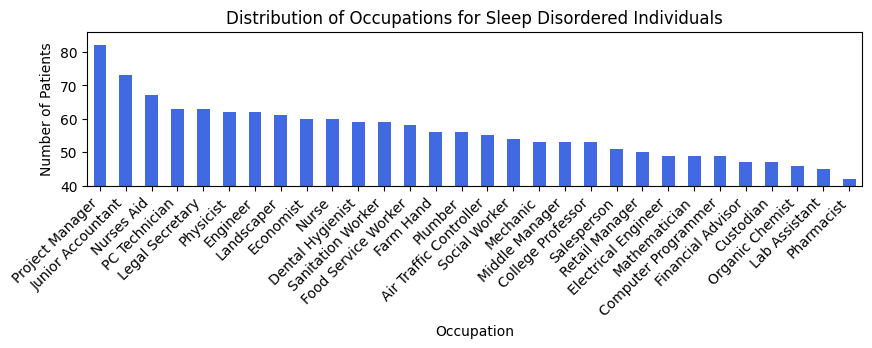

In [30]:
#Grabbing our occupation_counts variable to make a plot with MatPlotLib, and setting parameters for axis as well as colors.  
plt.figure(figsize=(10, 2))
occupation_counts.plot(kind='bar', color='royalblue')
plt.title('Distribution of Occupations for Sleep Disordered Individuals')
plt.xlabel('Occupation')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')
plt.ylim(40, None)
plt.show()

## 2. How do sleep disorders contribute to stress levels vs others without a sleep disorder?

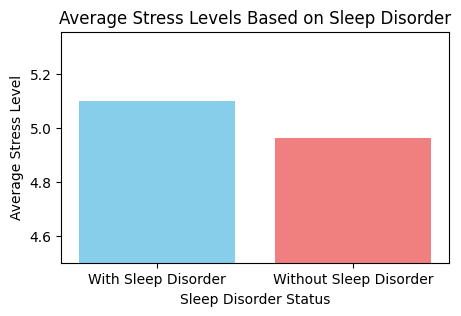

In [31]:
#Defining our categories, and grouping our prior stress data into one variable 
disorder_categories = ['With Sleep Disorder', 'Without Sleep Disorder']
avg_stress_data = [avg_stress_with_disorder, avg_stress_no_disorder]

# Plotting the bar graph
plt.figure(figsize=(5, 3))
plt.bar(disorder_categories, avg_stress_data, color=['skyblue', 'lightcoral'])
plt.title('Average Stress Levels Based on Sleep Disorder')
plt.xlabel('Sleep Disorder Status')
plt.ylabel('Average Stress Level')
plt.ylim(4.5, None)
plt.show()

## 3. Do overweight individuals with sleep disorders experience more stress?

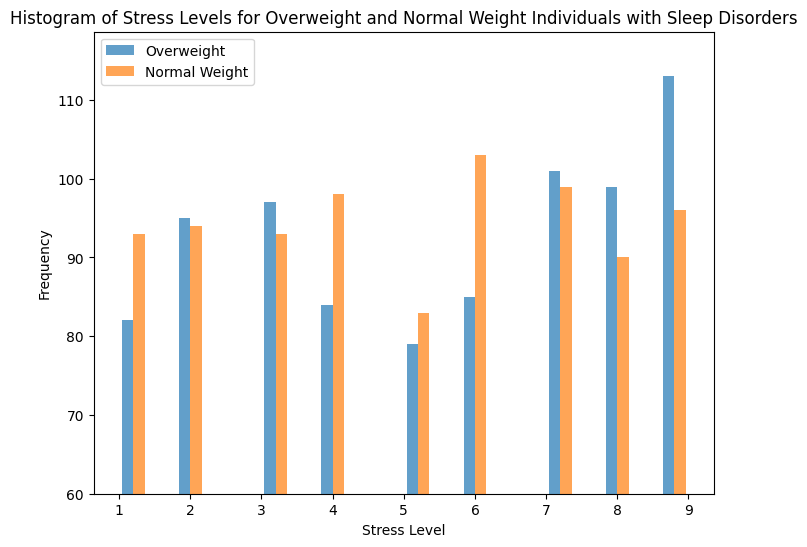

In [32]:
# Extract stress levels for overweight and normal-weight individuals
overweight_stress_levels = overweight_disordered['Stress Level']
normalweight_stress_levels = normalweight_disordered['Stress Level']

# Create histograms
plt.figure(figsize=(8, 6))
plt.hist([overweight_stress_levels, normalweight_stress_levels], bins=20, alpha=0.7, label=['Overweight', 'Normal Weight'])
plt.title('Histogram of Stress Levels for Overweight and Normal Weight Individuals with Sleep Disorders')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.ylim(60, None)
plt.legend()
plt.show()

## 4. Which gender is more likely to have higher stress levels due to sleep disorders?

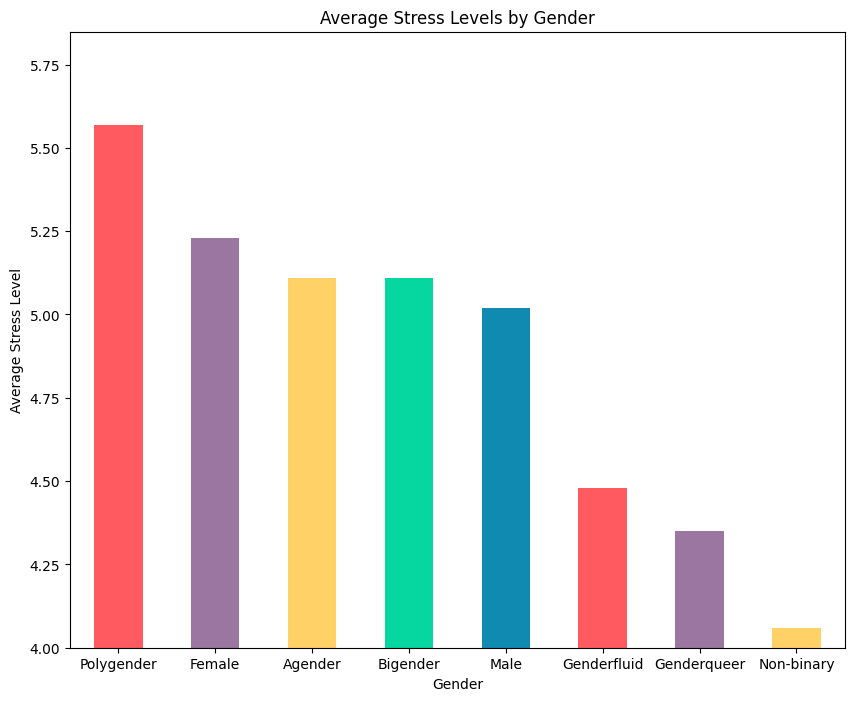

In [33]:
#Finding the average stress by gender of those with a sleep disorder
stress_by_gender = has_disorder.groupby('Gender')['Stress Level'].mean().round(decimals=2).sort_values(ascending=False)

# Define LGBTQ-friendly colors
colors = ['#FF5A5F', '#9A76A1', '#FFD166', '#06D6A0', '#118AB2']

# Create a bar graph
plt.figure(figsize=(10, 8))
stress_by_gender.plot(kind='bar', color=colors)
plt.title('Average Stress Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Stress Level')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.ylim(4, None)
plt.show()

## 5. Which career(s) are more stressful with sleep disorders?

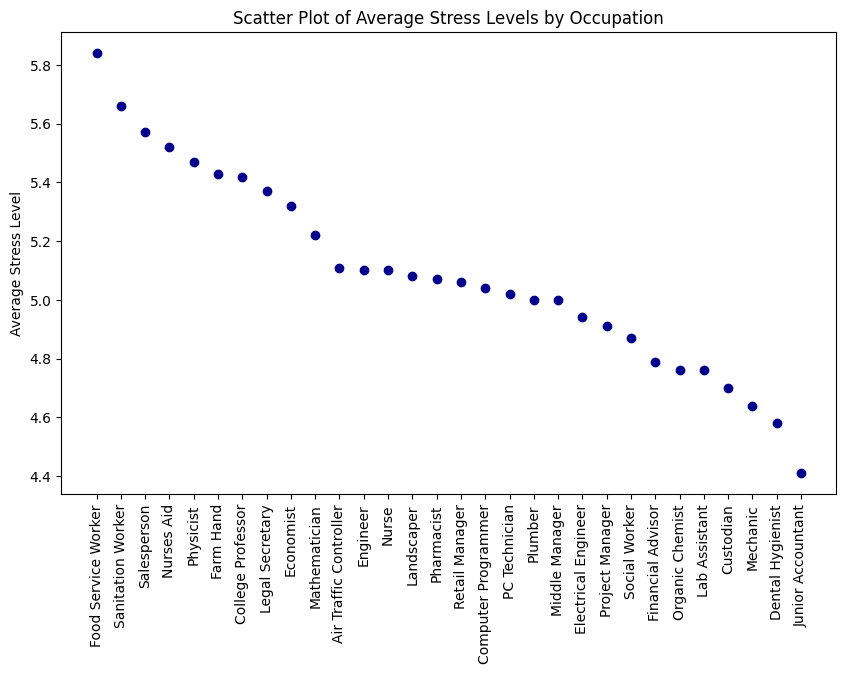

In [34]:
#Grabbing the mean stress levels based on career for those with sleep disorders 
stressful_careers = has_disorder.groupby('occupation')['Stress Level'].mean().round(decimals=2).sort_values(ascending=False)

# Create a scatter plot with reversed axes
plt.figure(figsize=(10, 6))
plt.scatter(range(len(stressful_careers)), stressful_careers.values, color='darkblue', marker='o')
plt.title('Scatter Plot of Average Stress Levels by Occupation')
plt.ylabel('Average Stress Level')
plt.xticks(range(len(stressful_careers)), stressful_careers.index, rotation=90)  # Show occupations on the x-axis
plt.show()

## 6. Does a higher physical activity level make you less likely to have a sleep disorder?

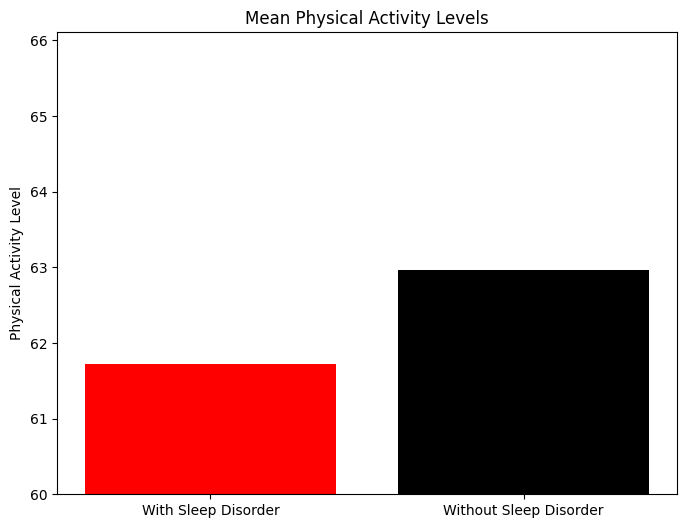

In [35]:
#Grabbing the average physical activity level for both groups 
disordered_activity = has_disorder['Physical Activity Level'].mean().round(decimals=2)
normal_activity = no_disorder['Physical Activity Level'].mean().round(decimals=2)

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(['With Sleep Disorder', 'Without Sleep Disorder'], [disordered_activity, normal_activity], color=['red', 'black'])
plt.title('Mean Physical Activity Levels')
plt.ylabel('Physical Activity Level')
plt.ylim(60, None)
plt.show()


## 7. Do those with sleep disorders earn more, less, or the same as those without sleep disorders?

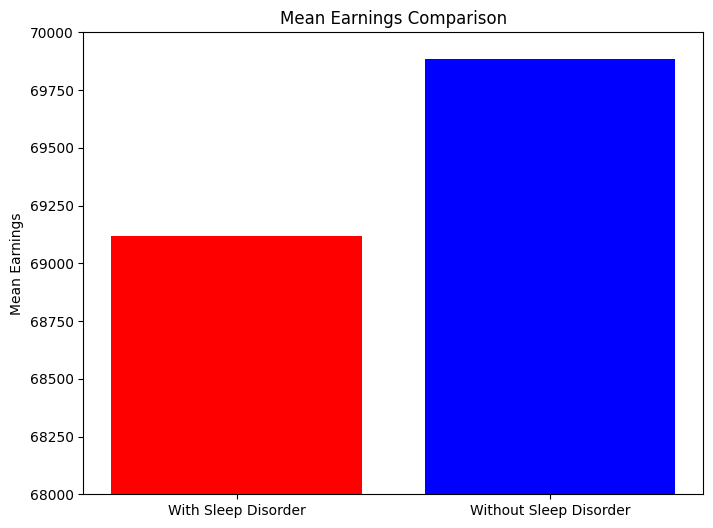

In [36]:
#Grabbing the average earnings for both groups 
disordered_earnings = has_disorder['salary'].mean().round().astype(int)
normal_earnings = no_disorder['salary'].mean().round().astype(int)

# Create a bar graph with adjusted y-axis scale
plt.figure(figsize=(8, 6))
plt.bar(['With Sleep Disorder', 'Without Sleep Disorder'], [disordered_earnings, normal_earnings], color=['red', 'blue'])
plt.title('Mean Earnings Comparison')
plt.ylabel('Mean Earnings')
plt.ylim(68000, 70000)
plt.show()


## 8. Does having a sleep disorder present a barrier to higher education?

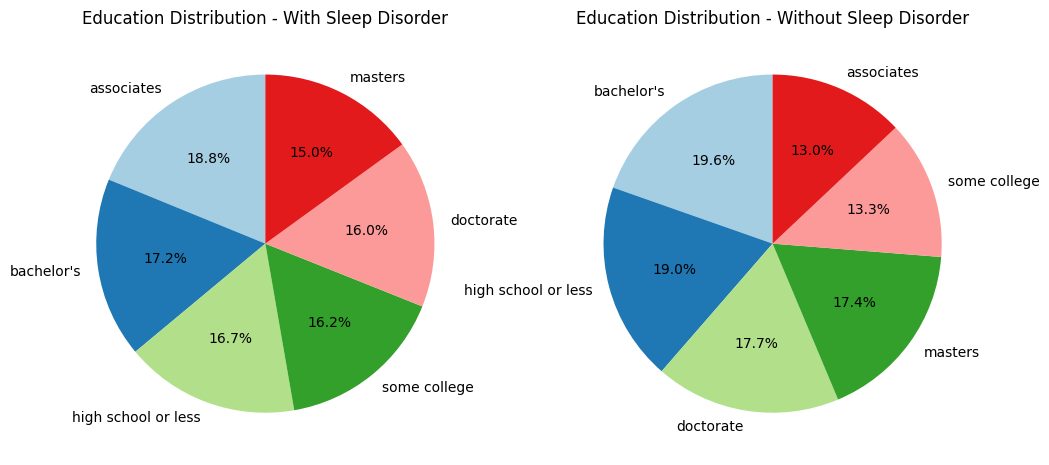

In [37]:
#Grabbing value counts from each group based on education level, and converting to a percentage
with_disorder_percentage = has_disorder['education level'].value_counts(normalize=True).round(decimals=4) * 100
without_disorder_percentage = no_disorder['education level'].value_counts(normalize=True).round(decimals=4) * 100

# Create two pie charts side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for the group with sleep disorder
axs[0].pie(with_disorder_percentage, labels=with_disorder_percentage.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axs[0].set_title('Education Distribution - With Sleep Disorder')

# Pie chart for the group without sleep disorder
axs[1].pie(without_disorder_percentage, labels=without_disorder_percentage.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axs[1].set_title('Education Distribution - Without Sleep Disorder')

plt.show()

## 9. Do certain countries have higher rates of sleep disorders?

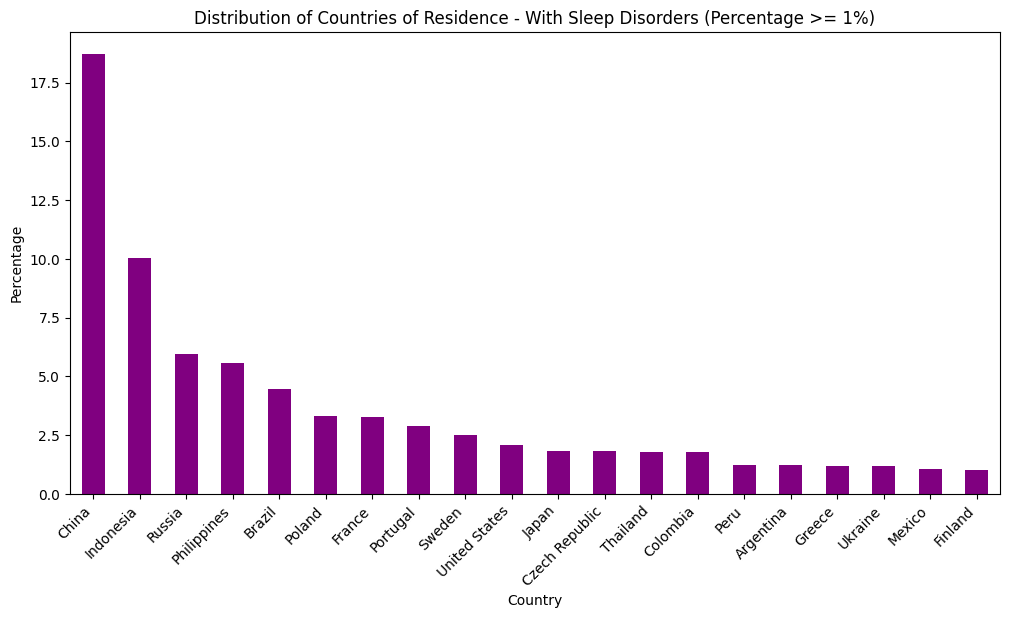

In [38]:
disordered_countries = has_disorder['Country of Residence'].value_counts(normalize=True).round(decimals=4) * 100

# Filter out countries with a percentage value less than 8%
filtered_countries = disordered_countries[disordered_countries >= 1]

# Create a histogram
plt.figure(figsize=(12, 6))
filtered_countries.plot(kind='bar', color='purple')
plt.title('Distribution of Countries of Residence - With Sleep Disorders (Percentage >= 1%)')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()